# Recurrent neural networks

# Task 1

Get IBM stock market data and evaluate prediction on a set of recurrent neural networks.

Dataset can be downloaded from https://www.kaggle.com/szrlee/stock-time-series-20050101-to-20171231



## Subtask 1

Load data and prepare the dataset

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving IBM_2006-01-01_to_2018-01-01.csv to IBM_2006-01-01_to_2018-01-01.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data into a DataFrame
file_path = 'IBM_2006-01-01_to_2018-01-01.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

##chekcing if there is any nan value still present
print(df['Low'].isnull().values.any())


# plt.plot(df['Low'])
# set_index=

# xvalues=np.linspace(0,3000,1);

# # Plotting the stock graph
# plt.figure(figsize=(10, 6))
# plt.plot(df['Date'], df['Close'], label='Close Price', color='blue')
# plt.plot(df['Date'], df['Open'], label='Open Price', color='red')
# plt.subplot(2,1,1);
# plt.plot(df['Open'], df['Close'], label='Open Price', color='green')

# plt.title('Stock Price Over Time')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()

True


In [ ]:
df = df.dropna()

In [ ]:
##chekcing if there is any nan value still present
print(df['Low'].isnull().values.any())

False


In [ ]:
#plotting column values Low
plt.plot(df['Low'])
plt.show()

In [ ]:
print(df['Low'])

0        80.81
1        81.33
2        81.00
3        83.41
4        83.38
         ...  
3015    151.50
3016    152.50
3017    152.61
3018    153.20
3019    153.42
Name: Low, Length: 3019, dtype: float64


In [ ]:
# low_prices = df['Low'].values.reshape(-1, 1)
low_prices = df['Low'].values.reshape(-1,1)
print(low_prices)
print(low_prices.shape)

[[ 80.81]
 [ 81.33]
 [ 81.  ]
 ...
 [152.61]
 [153.2 ]
 [153.42]]
(3019, 1)


In [ ]:
# import pandas as pd
# import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# file_path = 'IBM_2006-01-01_to_2018-01-01.csv'
# df = pd.read_csv(file_path, parse_dates=['Date'])
#     # print(df)
# df = df.dropna()
#     # print(df)
#     # df.set_index('Date', inplace=True)
#     # print(df['Low'].values.reshape(-1, 1))
low_prices = df['Low'].values.reshape(-1, 1)
# print(low_prices)
scaler = MinMaxScaler()
normalized_low_prices = scaler.fit_transform(low_prices)
print(normalized_low_prices)
print(normalized_low_prices.max())
print(normalized_low_prices.min())

[[0.07810773]
 [0.0816989 ]
 [0.07941989]
 ...
 [0.57396409]
 [0.57803867]
 [0.57955801]]
1.0
0.0


In [ ]:

df_normalized_low = pd.DataFrame(data=normalized_low_prices, index=df.index, columns=['Normalized_Low'])
print(df_normalized_low)


      Normalized_Low
0           0.078108
1           0.081699
2           0.079420
3           0.096064
4           0.095856
...              ...
3015        0.566298
3016        0.573204
3017        0.573964
3018        0.578039
3019        0.579558

[3019 rows x 1 columns]


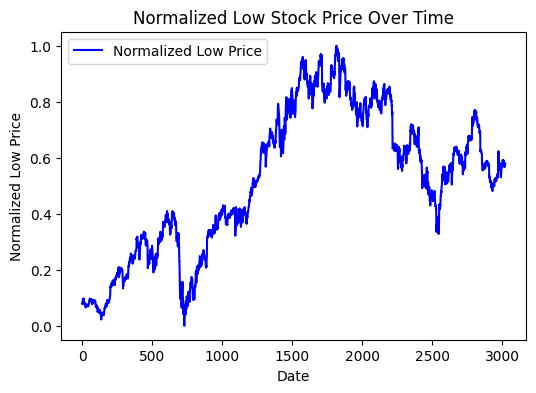

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(df_normalized_low.index, df_normalized_low['Normalized_Low'], label='Normalized Low Price', color='blue')
plt.title('Normalized Low Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Normalized Low Price')
plt.legend()
plt.show()

# Subtask 2

Perform prediction by using feed-forward neural network (sliding window)


Perform prediction by using feed-forward neural network (sliding window).Take a time series and window size as 5. for every 5 values there is a desired output.
Use activation relu, sinoid and dense 20.Plot a graph of the rignal time series and the predicted time series.


Epoch 1/50
76/76 - 1s - loss: 0.0123 - 1s/epoch - 18ms/step
Epoch 2/50
76/76 - 0s - loss: 4.8765e-04 - 260ms/epoch - 3ms/step
Epoch 3/50
76/76 - 0s - loss: 3.8500e-04 - 174ms/epoch - 2ms/step
Epoch 4/50
76/76 - 0s - loss: 3.7169e-04 - 90ms/epoch - 1ms/step
Epoch 5/50
76/76 - 0s - loss: 3.5503e-04 - 84ms/epoch - 1ms/step
Epoch 6/50
76/76 - 0s - loss: 3.4581e-04 - 88ms/epoch - 1ms/step
Epoch 7/50
76/76 - 0s - loss: 3.1116e-04 - 85ms/epoch - 1ms/step
Epoch 8/50
76/76 - 0s - loss: 2.8106e-04 - 84ms/epoch - 1ms/step
Epoch 9/50
76/76 - 0s - loss: 2.6114e-04 - 86ms/epoch - 1ms/step
Epoch 10/50
76/76 - 0s - loss: 2.4590e-04 - 88ms/epoch - 1ms/step
Epoch 11/50
76/76 - 0s - loss: 2.3392e-04 - 91ms/epoch - 1ms/step
Epoch 12/50
76/76 - 0s - loss: 2.3183e-04 - 84ms/epoch - 1ms/step
Epoch 13/50
76/76 - 0s - loss: 2.2991e-04 - 91ms/epoch - 1ms/step
Epoch 14/50
76/76 - 0s - loss: 2.1425e-04 - 94ms/epoch - 1ms/step
Epoch 15/50
76/76 - 0s - loss: 2.1210e-04 - 85ms/epoch - 1ms/step
Epoch 16/50
76/76 - 0s

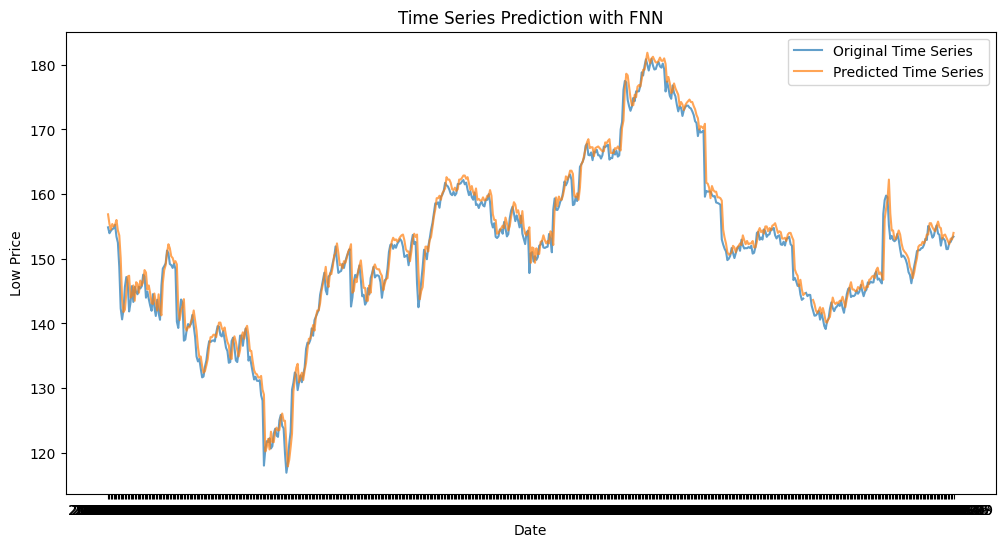

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, Lambda
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv')
time_series = df['Low'].values

# Normalize data
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1)).flatten()

# Create sequences
def create_sequences(time_series, window_size):
    X = []
    y = []
    for i in range(len(time_series) - window_size):
        X.append(time_series[i:i+window_size])
        y.append(time_series[i+window_size])
    return np.array(X), np.array(y)

# Define window size
window_size = 5

# Create sequences
X, y = create_sequences(time_series_scaled, window_size)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the model with custom activation function using Lambda layer
model = Sequential([
    Dense(20, activation='relu', input_shape=(window_size,)),
    Dense(1)  # Output layer with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
predictions_scaled = model.predict(X_test).flatten()

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][split + window_size:], time_series[split + window_size:], label='Original Time Series', alpha=0.7)
plt.plot(df['Date'][split + window_size:], predictions, label='Predicted Time Series', alpha=0.7)
plt.title('Time Series Prediction with FNN')
plt.xlabel('Date')
plt.ylabel('Low Price')
plt.legend()
plt.show()

Epoch 1/50
25/25 - 1s - loss: 9.2727 - 1s/epoch - 54ms/step
Epoch 2/50
25/25 - 0s - loss: 6.1961 - 47ms/epoch - 2ms/step
Epoch 3/50
25/25 - 0s - loss: 4.1463 - 54ms/epoch - 2ms/step
Epoch 4/50
25/25 - 0s - loss: 3.1304 - 58ms/epoch - 2ms/step
Epoch 5/50
25/25 - 0s - loss: 2.6406 - 47ms/epoch - 2ms/step
Epoch 6/50
25/25 - 0s - loss: 2.2483 - 68ms/epoch - 3ms/step
Epoch 7/50
25/25 - 0s - loss: 1.8772 - 52ms/epoch - 2ms/step
Epoch 8/50
25/25 - 0s - loss: 1.5689 - 52ms/epoch - 2ms/step
Epoch 9/50
25/25 - 0s - loss: 1.2844 - 50ms/epoch - 2ms/step
Epoch 10/50
25/25 - 0s - loss: 1.0216 - 50ms/epoch - 2ms/step
Epoch 11/50
25/25 - 0s - loss: 0.8141 - 52ms/epoch - 2ms/step
Epoch 12/50
25/25 - 0s - loss: 0.6424 - 48ms/epoch - 2ms/step
Epoch 13/50
25/25 - 0s - loss: 0.5162 - 45ms/epoch - 2ms/step
Epoch 14/50
25/25 - 0s - loss: 0.4222 - 48ms/epoch - 2ms/step
Epoch 15/50
25/25 - 0s - loss: 0.3631 - 47ms/epoch - 2ms/step
Epoch 16/50
25/25 - 0s - loss: 0.3156 - 52ms/epoch - 2ms/step
Epoch 17/50
25/25 

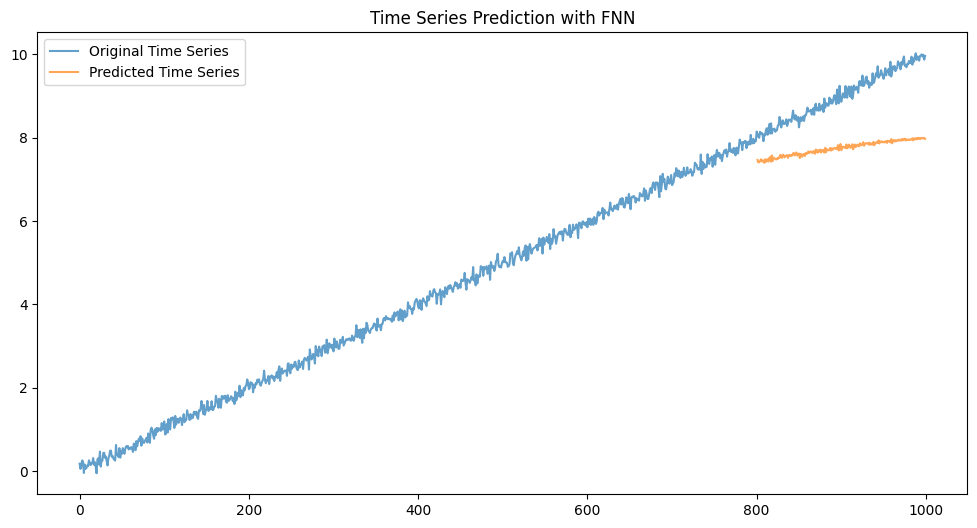

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate a simple time series
np.random.seed(0)
time_series = np.linspace(0, 10, 1000) + np.random.normal(scale=0.1, size=1000)

# Create input sequences and corresponding output for training
def create_sequences(time_series, window_size):
    sequences, targets = [], []
    for i in range(len(time_series) - window_size):
        seq = time_series[i:i+window_size]
        target = time_series[i+window_size]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

window_size = 5
X, y = create_sequences(time_series, window_size)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(window_size,)),
    tf.keras.layers.Dense(20, activation='sigmoid'),
    tf.keras.layers.Dense(1)  # Output layer with linear activation for regression
])

# model = Sequential([
#   Dense(20, activation='relu', input_shape=[window_size]),
#   Dense(1)
# ])

# model = Sequential([
#   LSTM(20, activation='relu', input_shape=[window_size, 1]),
#   Dense(1)
# ])


# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
predictions = model.predict(X_test)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(time_series, label='Original Time Series', alpha=0.7)
plt.plot(np.arange(split + window_size, len(time_series)), predictions, label='Predicted Time Series', alpha=0.7)
plt.title('Time Series Prediction with FNN')
plt.legend()
plt.show()


The dtype policy mixed_float16 may run slowly because this machine does not have a GPU. Only Nvidia GPUs with compute capability of at least 7.0 run quickly with mixed_float16.
If you will use compatible GPU(s) not attached to this host, e.g. by running a multi-worker model, you can ignore this warning. This message will only be logged once


Epoch 1/50
63/76 [=======================>......] - ETA: 0s - loss: 0.1586

76/76 [==============================] - 2s 5ms/step - loss: 0.1345
Epoch 2/50
66/76 [=========================>....] - ETA: 0s - loss: 0.0035

76/76 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 3/50
70/76 [==========================>...] - ETA: 0s - loss: 4.5897e-04

76/76 [==============================] - 0s 4ms/step - loss: 4.5037e-04
Epoch 4/50
66/76 [=========================>....] - ETA: 0s - loss: 3.6302e-04

76/76 [==============================] - 0s 3ms/step - loss: 3.7355e-04
Epoch 5/50
66/76 [=========================>....] - ETA: 0s - loss: 3.6147e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.5860e-04
Epoch 6/50
70/76 [==========================>...] - ETA: 0s - loss: 3.5607e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.5646e-04
Epoch 7/50
69/76 [==========================>...] - ETA: 0s - loss: 3.4920e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.4786e-04
Epoch 8/50
63/76 [=======================>......] - ETA: 0s - loss: 3.4704e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.4022e-04
Epoch 9/50
72/76 [===========================>..] - ETA: 0s - loss: 3.3767e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.3805e-04
Epoch 10/50
71/76 [===========================>..] - ETA: 0s - loss: 3.3859e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.3300e-04
Epoch 11/50
68/76 [=========================>....] - ETA: 0s - loss: 3.3164e-04

76/76 [==============================] - 0s 5ms/step - loss: 3.3767e-04
Epoch 12/50
70/76 [==========================>...] - ETA: 0s - loss: 3.3250e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.2840e-04
Epoch 13/50
68/76 [=========================>....] - ETA: 0s - loss: 3.3065e-04

76/76 [==============================] - 0s 5ms/step - loss: 3.2365e-04
Epoch 14/50
67/76 [=========================>....] - ETA: 0s - loss: 3.2096e-04

76/76 [==============================] - 0s 5ms/step - loss: 3.2055e-04
Epoch 15/50
63/76 [=======================>......] - ETA: 0s - loss: 3.1122e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.1231e-04
Epoch 16/50
70/76 [==========================>...] - ETA: 0s - loss: 3.1687e-04

76/76 [==============================] - 0s 5ms/step - loss: 3.1894e-04
Epoch 17/50
63/76 [=======================>......] - ETA: 0s - loss: 3.0012e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.0683e-04
Epoch 18/50
74/76 [============================>.] - ETA: 0s - loss: 3.1142e-04

76/76 [==============================] - 1s 7ms/step - loss: 3.1145e-04
Epoch 19/50
68/76 [=========================>....] - ETA: 0s - loss: 3.0152e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.0184e-04
Epoch 20/50
68/76 [=========================>....] - ETA: 0s - loss: 3.0073e-04

76/76 [==============================] - 0s 4ms/step - loss: 3.0643e-04
Epoch 21/50
67/76 [=========================>....] - ETA: 0s - loss: 2.9165e-04

76/76 [==============================] - 0s 3ms/step - loss: 2.9282e-04
Epoch 22/50
68/76 [=========================>....] - ETA: 0s - loss: 2.8598e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.8925e-04
Epoch 23/50
73/76 [===========================>..] - ETA: 0s - loss: 2.8724e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.8541e-04
Epoch 24/50
66/76 [=========================>....] - ETA: 0s - loss: 2.8833e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.8316e-04
Epoch 25/50
75/76 [============================>.] - ETA: 0s - loss: 2.7859e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.7815e-04
Epoch 26/50
75/76 [============================>.] - ETA: 0s - loss: 2.7695e-04

76/76 [==============================] - 0s 5ms/step - loss: 2.7637e-04
Epoch 27/50
64/76 [========================>.....] - ETA: 0s - loss: 2.6678e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.6835e-04
Epoch 28/50
70/76 [==========================>...] - ETA: 0s - loss: 2.6403e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.6597e-04
Epoch 29/50
74/76 [============================>.] - ETA: 0s - loss: 2.6404e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.7246e-04
Epoch 30/50
71/76 [===========================>..] - ETA: 0s - loss: 2.7241e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.7196e-04
Epoch 31/50
65/76 [========================>.....] - ETA: 0s - loss: 2.4810e-04

76/76 [==============================] - 0s 5ms/step - loss: 2.5165e-04
Epoch 32/50
69/76 [==========================>...] - ETA: 0s - loss: 2.6133e-04

76/76 [==============================] - 0s 6ms/step - loss: 2.6160e-04
Epoch 33/50
65/76 [========================>.....] - ETA: 0s - loss: 2.4878e-04

76/76 [==============================] - 0s 6ms/step - loss: 2.4799e-04
Epoch 34/50
75/76 [============================>.] - ETA: 0s - loss: 2.5550e-04

76/76 [==============================] - 1s 6ms/step - loss: 2.5529e-04
Epoch 35/50
76/76 [==============================] - ETA: 0s - loss: 2.4692e-04

76/76 [==============================] - 0s 5ms/step - loss: 2.4692e-04
Epoch 36/50
62/76 [=======================>......] - ETA: 0s - loss: 2.4036e-04

76/76 [==============================] - 0s 5ms/step - loss: 2.4335e-04
Epoch 37/50
73/76 [===========================>..] - ETA: 0s - loss: 2.3982e-04

76/76 [==============================] - 0s 5ms/step - loss: 2.4016e-04
Epoch 38/50
71/76 [===========================>..] - ETA: 0s - loss: 2.3267e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.3629e-04
Epoch 39/50
76/76 [==============================] - ETA: 0s - loss: 2.3376e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.3376e-04
Epoch 40/50
68/76 [=========================>....] - ETA: 0s - loss: 2.3331e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.3237e-04
Epoch 41/50
68/76 [=========================>....] - ETA: 0s - loss: 2.2869e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.3119e-04
Epoch 42/50
68/76 [=========================>....] - ETA: 0s - loss: 2.1825e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.2218e-04
Epoch 43/50
70/76 [==========================>...] - ETA: 0s - loss: 2.1758e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.1640e-04
Epoch 44/50
69/76 [==========================>...] - ETA: 0s - loss: 2.2004e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.2617e-04
Epoch 45/50
71/76 [===========================>..] - ETA: 0s - loss: 2.1642e-04

76/76 [==============================] - 0s 6ms/step - loss: 2.2012e-04
Epoch 46/50
75/76 [============================>.] - ETA: 0s - loss: 2.2369e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.2377e-04
Epoch 47/50
72/76 [===========================>..] - ETA: 0s - loss: 2.1603e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.2158e-04
Epoch 48/50
74/76 [============================>.] - ETA: 0s - loss: 2.1318e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.1210e-04
Epoch 49/50
69/76 [==========================>...] - ETA: 0s - loss: 2.1300e-04

76/76 [==============================] - 0s 4ms/step - loss: 2.1106e-04
Epoch 50/50
63/76 [=======================>......] - ETA: 0s - loss: 2.1135e-04

19/19 [==============================] - 0s 2ms/step


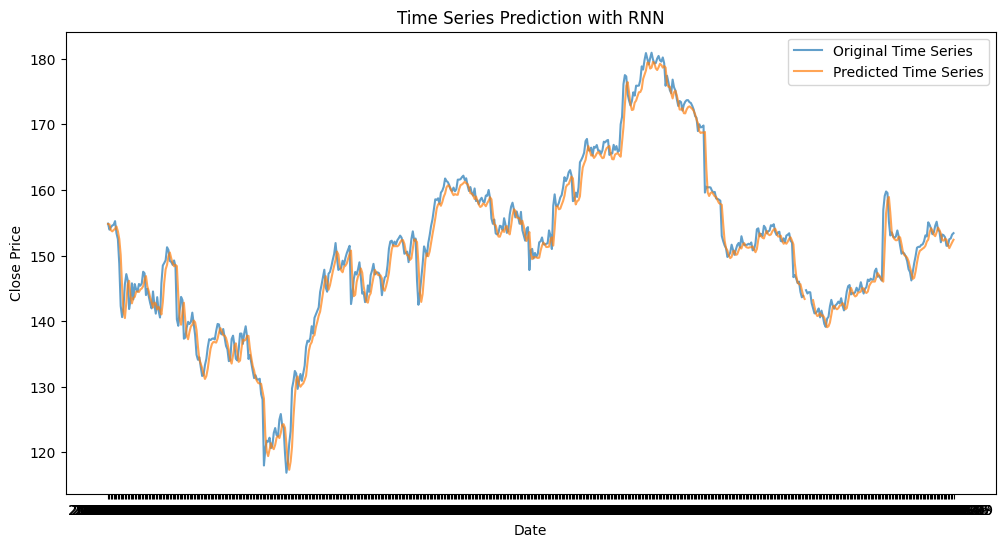

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras.mixed_precision as mixed_precision

def create_sequences(time_series, window_size):
    X = []
    y = []
    for i in range(len(time_series) - window_size):
        X.append(time_series[i:i+window_size])
        y.append(time_series[i+window_size])
    return np.array(X), np.array(y)

# Load data
df = pd.read_csv('./IBM_2006-01-01_to_2018-01-01.csv')
time_series = df['Low'].values

# Normalize data
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1)).flatten()

# Create sequences
window_size = 5
X, y = create_sequences(time_series_scaled, window_size)

# Split data
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Model
model = Sequential([
  LSTM(20, activation='relu', input_shape=[window_size, 1]),
  Dense(1)
])

# Mixed precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Compile and fit
model.compile(optimizer='adam', loss='mse')

model.fit(X_train.reshape(-1, window_size, 1), y_train, epochs=50, batch_size=32,
          callbacks=[tf.keras.callbacks.EarlyStopping(patience=3)])

# Make predictions on the test set
predictions_scaled = model.predict(X_test.reshape(-1, window_size, 1)).flatten()

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][split + window_size:], time_series[split + window_size:], label='Original Time Series', alpha=0.7)
plt.plot(df['Date'][split + window_size:], predictions, label='Predicted Time Series', alpha=0.7)
plt.title('Time Series Prediction with RNN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Generate a simple time series
np.random.seed(0)
time_series = np.linspace(0, 10, 1000) + np.random.normal(scale=0.1, size=1000)
# print("\n",)
print("\n time_series\n",time_series)
# print("\n",)

# Create input sequences and corresponding output for training
def create_sequences(time_series, window_size):
    sequences, targets = [], []
    for i in range(len(time_series) - window_size):
        seq = time_series[i:i+window_size]
        target = time_series[i+window_size]
        sequences.append(seq)
        targets.append(target)
    print("\ntarget " ,len(np.array(targets)))
    print("\nsequences ",len(np.array(sequences)) )
    # return np.array(sequences), np.array(targets)

window_size = 5
X, y = create_sequences(time_series, window_size)


 time_series
 [ 0.17640523  0.05002573  0.11789382  0.25411935  0.22679584 -0.04767774
  0.1550689   0.05493435  0.06975819  0.13114994  0.11450446  0.25553746
  0.19622389  0.14229763  0.18452646  0.18351758  0.30956807  0.14965434
  0.21148695  0.10478062 -0.05509878  0.27557207  0.30666384  0.15601373
  0.4672157   0.10481368  0.26483611  0.25155189  0.4335582   0.43722617
  0.31579504  0.34812656  0.23154175  0.13225068  0.30554913  0.36598525
  0.48338943  0.49060836  0.3416477   0.36016012  0.2955451   0.26840862
  0.2497934   0.62550797  0.38947522  0.40664302  0.33518092  0.54821951
  0.3190907   0.46921646  0.41095384  0.54920076  0.46944001  0.41246731
  0.53772232  0.59338374  0.56721228  0.60081776  0.51714837  0.55431647
  0.53335456  0.57465529  0.53930599  0.45800237  0.65838325  0.61047256
  0.49764083  0.7169489   0.58995084  0.69588523  0.77360976  0.723609
  0.83466079  0.60724815  0.7809749   0.68226974  0.67368105  0.7128858
  0.74962553  0.79640733  0.68428582  0

TypeError: ignored

Epoch 1/50
76/76 - 2s - loss: 6.1945e-04 - 2s/epoch - 24ms/step
Epoch 2/50
76/76 - 0s - loss: 4.7253e-04 - 254ms/epoch - 3ms/step
Epoch 3/50
76/76 - 0s - loss: 4.1852e-04 - 180ms/epoch - 2ms/step
Epoch 4/50
76/76 - 0s - loss: 3.3509e-04 - 200ms/epoch - 3ms/step
Epoch 5/50
76/76 - 0s - loss: 3.0487e-04 - 173ms/epoch - 2ms/step
Epoch 6/50
76/76 - 0s - loss: 2.7449e-04 - 209ms/epoch - 3ms/step
Epoch 7/50
76/76 - 0s - loss: 2.6460e-04 - 186ms/epoch - 2ms/step
Epoch 8/50
76/76 - 0s - loss: 2.5395e-04 - 191ms/epoch - 3ms/step
Epoch 9/50
76/76 - 0s - loss: 2.5083e-04 - 121ms/epoch - 2ms/step
Epoch 10/50
76/76 - 0s - loss: 2.4572e-04 - 147ms/epoch - 2ms/step
Epoch 11/50
76/76 - 0s - loss: 2.3520e-04 - 120ms/epoch - 2ms/step
Epoch 12/50
76/76 - 0s - loss: 2.2516e-04 - 138ms/epoch - 2ms/step
Epoch 13/50
76/76 - 0s - loss: 2.2324e-04 - 128ms/epoch - 2ms/step
Epoch 14/50
76/76 - 0s - loss: 2.3463e-04 - 134ms/epoch - 2ms/step
Epoch 15/50
76/76 - 0s - loss: 2.2388e-04 - 145ms/epoch - 2ms/step
Epoch 

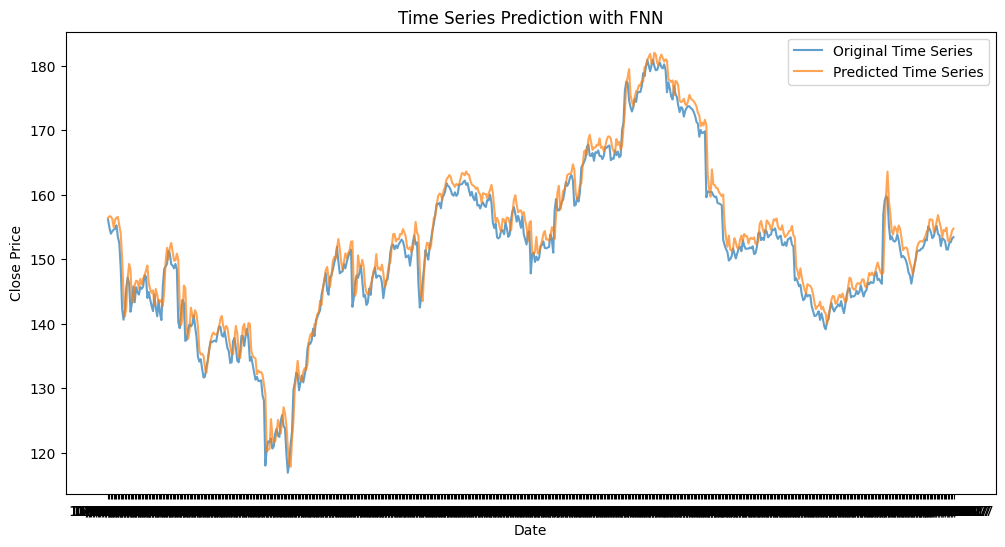

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
# For this example, let's assume your dataset is in a CSV file named 'your_dataset.csv'
# Adjust the file name and path accordingly.
df = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv')
df=df.dropna()
# Choose the column you want to predict (e.g., 'Close')
time_series = df['Low'].values

# Normalize the time series using Min-Max scaling
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1)).flatten()

# Create input sequences and corresponding output for training
def create_sequences(time_series, window_size):
    sequences, targets = [], []
    for i in range(len(time_series) - window_size):
        seq = time_series[i:i+window_size]
        target = time_series[i+window_size]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

window_size = 5
X, y = create_sequences(time_series_scaled, window_size)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Define the model with a custom activation function using Lambda layer
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(window_size,)),
    tf.keras.layers.Lambda(lambda x: tf.math.sin(x)),  # Custom sin activation
    tf.keras.layers.Dense(1)  # Output layer with linear activation for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
predictions_scaled = model.predict(X_test).flatten()

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][split + window_size:], time_series[split + window_size:], label='Original Time Series', alpha=0.7)
plt.plot(df['Date'][split + window_size:], predictions, label='Predicted Time Series', alpha=0.7)
plt.title('Time Series Prediction with FNN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Subtask 3

Perform prediction by using RNN

Epoch 1/50
76/76 - 1s - loss: 0.0198 - 1s/epoch - 17ms/step
Epoch 2/50
76/76 - 0s - loss: 3.6937e-04 - 199ms/epoch - 3ms/step
Epoch 3/50
76/76 - 0s - loss: 3.1863e-04 - 221ms/epoch - 3ms/step
Epoch 4/50
76/76 - 0s - loss: 3.1086e-04 - 198ms/epoch - 3ms/step
Epoch 5/50
76/76 - 0s - loss: 3.0787e-04 - 216ms/epoch - 3ms/step
Epoch 6/50
76/76 - 0s - loss: 2.9963e-04 - 209ms/epoch - 3ms/step
Epoch 7/50
76/76 - 0s - loss: 2.9187e-04 - 214ms/epoch - 3ms/step
Epoch 8/50
76/76 - 0s - loss: 2.9357e-04 - 229ms/epoch - 3ms/step
Epoch 9/50
76/76 - 0s - loss: 2.8987e-04 - 185ms/epoch - 2ms/step
Epoch 10/50
76/76 - 0s - loss: 2.7812e-04 - 188ms/epoch - 2ms/step
Epoch 11/50
76/76 - 0s - loss: 2.7592e-04 - 181ms/epoch - 2ms/step
Epoch 12/50
76/76 - 0s - loss: 2.6897e-04 - 241ms/epoch - 3ms/step
Epoch 13/50
76/76 - 0s - loss: 2.6300e-04 - 317ms/epoch - 4ms/step
Epoch 14/50
76/76 - 0s - loss: 2.6368e-04 - 340ms/epoch - 4ms/step
Epoch 15/50
76/76 - 0s - loss: 2.4928e-04 - 327ms/epoch - 4ms/step
Epoch 16/5

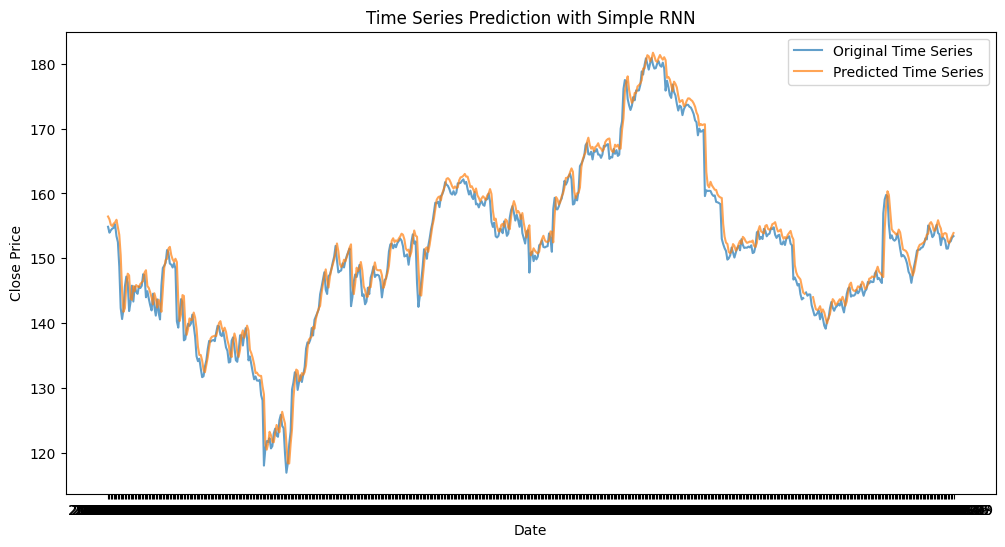

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler

# Load your dataset
# For this example, let's assume your dataset is in a CSV file named 'your_dataset.csv'
# Adjust the file name and path accordingly.
df = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv')

# Choose the column you want to predict (e.g., 'Close')
time_series = df['Low'].values

# Normalize the time series using Min-Max scaling
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1)).flatten()

# Create input sequences and corresponding output for training
def create_sequences(time_series, window_size):
    sequences, targets = [], []
    for i in range(len(time_series) - window_size):
        seq = time_series[i:i+window_size]
        target = time_series[i+window_size]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

window_size = 5
X, y = create_sequences(time_series_scaled, window_size)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input sequences for compatibility with RNN
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

# Define the simple RNN model
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(20, activation='relu', input_shape=(window_size, 1)),
    tf.keras.layers.Dense(1)  # Output layer with linear activation for regression
])

# model = Sequential([
#     SimpleRNN(20, activation='relu', input_shape=[window_size]),
#     Dense(1)
# ])

# model = Sequential([
#     LSTM(20, activation='relu', input_shape=[window_size]),
#     Dense(1)
# ])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
predictions_scaled = model.predict(X_test).flatten()

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][split + window_size:], time_series[split + window_size:], label='Original Time Series', alpha=0.7)
plt.plot(df['Date'][split + window_size:], predictions, label='Predicted Time Series', alpha=0.7)
plt.title('Time Series Prediction with Simple RNN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Subtask 4

Perform prediction by using LSTM

Epoch 1/50
76/76 - 2s - loss: 0.0802 - accuracy: 4.1477e-04 - 2s/epoch - 24ms/step
Epoch 2/50
76/76 - 0s - loss: 8.2059e-04 - accuracy: 8.2953e-04 - 305ms/epoch - 4ms/step
Epoch 3/50
76/76 - 0s - loss: 4.2385e-04 - accuracy: 8.2953e-04 - 290ms/epoch - 4ms/step
Epoch 4/50
76/76 - 0s - loss: 3.6423e-04 - accuracy: 8.2953e-04 - 303ms/epoch - 4ms/step
Epoch 5/50
76/76 - 0s - loss: 3.4941e-04 - accuracy: 8.2953e-04 - 284ms/epoch - 4ms/step
Epoch 6/50
76/76 - 0s - loss: 3.4558e-04 - accuracy: 8.2953e-04 - 290ms/epoch - 4ms/step
Epoch 7/50
76/76 - 0s - loss: 3.3954e-04 - accuracy: 8.2953e-04 - 274ms/epoch - 4ms/step
Epoch 8/50
76/76 - 0s - loss: 3.3294e-04 - accuracy: 8.2953e-04 - 279ms/epoch - 4ms/step
Epoch 9/50
76/76 - 0s - loss: 3.2853e-04 - accuracy: 8.2953e-04 - 314ms/epoch - 4ms/step
Epoch 10/50
76/76 - 0s - loss: 3.2953e-04 - accuracy: 8.2953e-04 - 296ms/epoch - 4ms/step
Epoch 11/50
76/76 - 0s - loss: 3.2373e-04 - accuracy: 8.2953e-04 - 323ms/epoch - 4ms/step
Epoch 12/50
76/76 - 1s - 

ValueError: ignored

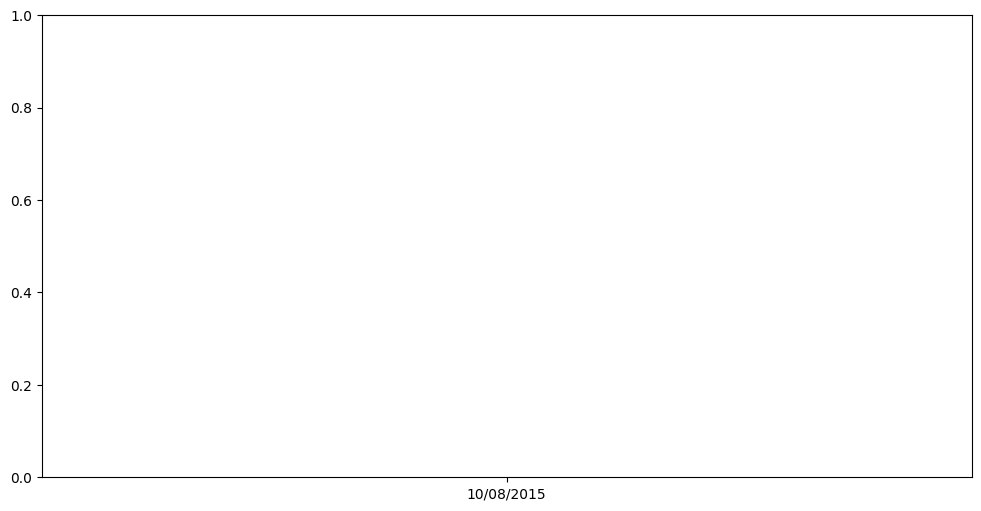

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import tensorflow.keras.mixed_precision as mixed_precision

# Load your dataset
# For this example, let's assume your dataset is in a CSV file named 'your_dataset.csv'
# Adjust the file name and path accordingly.
df = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv')
df=df.dropna()
# Choose the column you want to predict (e.g., 'Close')
time_series = df['Low'].values
# df=df.dropna()
# Normalize the time series using Min-Max scaling
scaler = MinMaxScaler()
time_series_scaled = scaler.fit_transform(time_series.reshape(-1, 1)).flatten()

# Create input sequences and corresponding output for training
def create_sequences(time_series, window_size):
    sequences, targets = [], []
    for i in range(len(time_series) - window_size):
        seq = time_series[i:i+window_size]
        target = time_series[i+window_size]
        sequences.append(seq)
        targets.append(target)
    return np.array(sequences), np.array(targets)

window_size = 5
X, y = create_sequences(time_series_scaled, window_size)

# Split the data into training and testing sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape input sequences for compatibility with RNN
X_train = np.reshape(X_train, (X_train.shape[0], window_size, 1))
# (batch_size, time_steps, input_features)
X_test = np.reshape(X_test, (X_test.shape[0], window_size, 1))

# Define the simple RNN model
# model = tf.keras.Sequential([
#     tf.keras.layers.SimpleRNN(20, activation='relu', input_shape=(window_size, 1)),
#     tf.keras.layers.Dense(1)  # Output layer with linear activation for regression
# ])

# model = Sequential([
#     SimpleRNN(20, activation='relu', input_shape=[window_size]),
#     Dense(1)
# ])

model = Sequential([
    LSTM(20, activation='relu', input_shape=[window_size,1]),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["accuracy"])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Make predictions on the test set
predictions_scaled = model.predict(X_test).flatten()

# Inverse transform the scaled predictions to the original scale
predictions = scaler.inverse_transform(predictions_scaled.reshape(-1, 1)).flatten()

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(df['Date'][split + window_size:], time_series[split + window_size-1:], label='Original Time Series', alpha=0.7)
plt.plot(df['Date'][split + window_size:], predictions, label='Predicted Time Series', alpha=0.7)
plt.title('Time Series Prediction with Simple RNN')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()


## Subtask 5

Compare all above results by using MSE error and dermine the best architecture. You can do tests on more stock data than IBM.

In [ ]:
from sklearn.metrics import mean_squared_error
from tensorflow.keras.layers import SimpleRNN

fnn_model = Sequential([
    Dense(20, activation='relu', input_shape=[window_size]),
    Dense(1)
])
fnn_model.compile(optimizer='adam', loss='mse')
fnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
fnn_predictions = fnn_model.predict(X_test)
fnn_mse = mean_squared_error(y_test, fnn_predictions)

# SimpleRNN
rnn_model = Sequential([
    SimpleRNN(20, activation='relu', input_shape=[window_size,1]),
    Dense(1)
])
rnn_model.compile(optimizer='adam', loss='mse')
rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
rnn_predictions = rnn_model.predict(X_test)
rnn_mse = mean_squared_error(y_test, rnn_predictions)

# LSTM
lstm_model = Sequential([
    LSTM(20, activation='relu', input_shape=[window_size,1]),
    Dense(1)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)
lstm_predictions = lstm_model.predict(X_test)
lstm_mse = mean_squared_error(y_test, lstm_predictions)

print("FNN MSE:", fnn_mse)
print("SimpleRNN MSE:", rnn_mse)
print("LSTM MSE:", lstm_mse)

Epoch 1/50
76/76 - 2s - loss: 0.0028 - 2s/epoch - 24ms/step
Epoch 2/50
76/76 - 0s - loss: 2.3667e-04 - 216ms/epoch - 3ms/step
Epoch 3/50
76/76 - 0s - loss: 2.3177e-04 - 380ms/epoch - 5ms/step
Epoch 4/50
76/76 - 0s - loss: 2.2655e-04 - 450ms/epoch - 6ms/step
Epoch 5/50
76/76 - 0s - loss: 2.0831e-04 - 336ms/epoch - 4ms/step
Epoch 6/50
76/76 - 0s - loss: 2.0511e-04 - 246ms/epoch - 3ms/step
Epoch 7/50
76/76 - 0s - loss: 1.9777e-04 - 227ms/epoch - 3ms/step
Epoch 8/50
76/76 - 0s - loss: 1.9158e-04 - 222ms/epoch - 3ms/step
Epoch 9/50
76/76 - 0s - loss: 1.8689e-04 - 196ms/epoch - 3ms/step
Epoch 10/50
76/76 - 0s - loss: 1.8144e-04 - 167ms/epoch - 2ms/step
Epoch 11/50
76/76 - 0s - loss: 1.7789e-04 - 117ms/epoch - 2ms/step
Epoch 12/50
76/76 - 0s - loss: 1.7781e-04 - 192ms/epoch - 3ms/step
Epoch 13/50
76/76 - 0s - loss: 1.7352e-04 - 188ms/epoch - 2ms/step
Epoch 14/50
76/76 - 0s - loss: 1.8107e-04 - 215ms/epoch - 3ms/step
Epoch 15/50
76/76 - 0s - loss: 1.7396e-04 - 223ms/epoch - 3ms/step
Epoch 16/5